# **MÓDULO 12 - Pratique**


In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [42]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(10)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


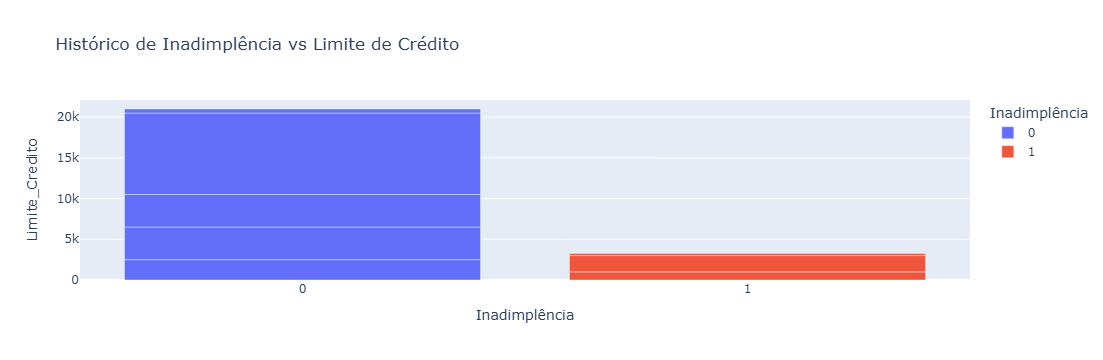

In [72]:
# Convertendo as colunas Salário e Limite_Credito para numérico
df['Salário'] = pd.to_numeric(df['Salário'])
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'])
df['Imovel_Proprio'] = pd.to_numeric(df['Imovel_Proprio'])

fig1 = px.bar(df, x='Historico_Inadimplencia', y='Limite_Credito', color='Historico_Inadimplencia',
              title='Histórico de Inadimplência vs Limite de Crédito', labels={'Historico_Inadimplencia':'Inadimplência'})
fig1.show()

## **Análise 1° Gráfico** 
A inadimplência é um dos principais fatores que influenciam diretamente o crédito disponível para o cliente. 
Aqueles sem histórico de inadimplência possuem um limite de crédito maior, 
possivelmente devido à maior confiança do banco na capacidade de pagamento.

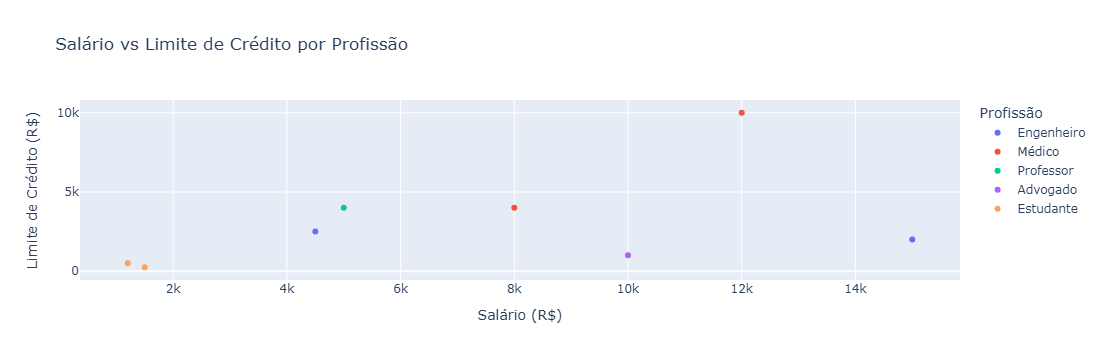

In [74]:
fig2 = px.scatter(df, x='Salário', y='Limite_Credito', color='Profissão',
                  title='Salário vs Limite de Crédito por Profissão', 
                  labels={'Salário':'Salário (R$)', 'Limite_Credito':'Limite de Crédito (R$)'})
fig2.show()

## **Análise 2° Gráfico**
Embora o senso comum sugira que um salário mais alto deve resultar em um limite de crédito maior, 
o gráfico sugere que outros fatores estão em jogo. Por exemplo, 
mesmo profissionais com salários menores podem ter um limite de crédito considerável, 
dependendo de seu perfil de risco e relação com o banco.

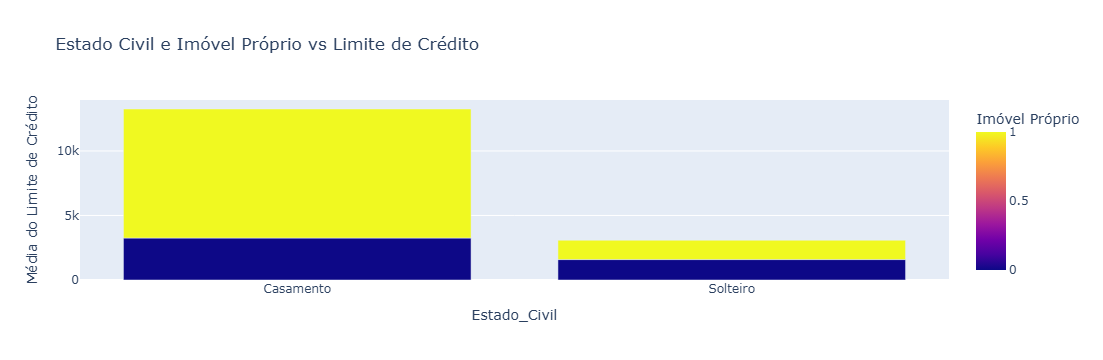

In [76]:
estado_bens = df.groupby(['Estado_Civil', 'Imovel_Proprio'])['Limite_Credito'].mean().reset_index()

# Gráfico de barras empilhadas para mostrar o impacto de estado civil e imóvel próprio no limite de crédito
fig3 = px.bar(estado_bens, x='Estado_Civil', y='Limite_Credito', color='Imovel_Proprio', 
              title='Estado Civil e Imóvel Próprio vs Limite de Crédito',
              labels={'Limite_Credito':'Média do Limite de Crédito', 'Imovel_Proprio':'Imóvel Próprio'})
fig3.show()

## **Análise 3° Gráfico**

O estado civil parece estar associado a uma maior estabilidade financeira, o que pode influenciar positivamente no limite de crédito. Ter um imóvel próprio reforça essa percepção de segurança financeira, aumentando a confiança das instituições em conceder um limite mais alto. Clientes casados e proprietários de imóveis são vistos como menos propensos ao risco de inadimplência, o que explica essa correlação.

# **Conclusão Geral**

**Inadimplência:** é o fator mais prejudicial para obter um limite de crédito elevado.

**Salário:** por si só, não determina o limite de crédito; outros fatores, como estabilidade financeira e histórico, parecem ter maior influência.

**Estado civil:** (casamento) e possuir um imóvel próprio são vistos como fatores de segurança, resultando em limites de crédito mais altos.